In [2]:
#import libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.layers import Dense
from keras.layers import Activation
from keras.layers import Dropout
from keras.models import Sequential
from keras.utils import np_utils

from sklearn.metrics import confusion_matrix

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print(X_train[0].shape)

11493376/11490434 [==============================] - 2s 0us/step
(28, 28)


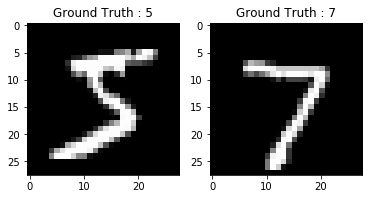

In [6]:
# Display first image in test data
plt.subplot(121)
plt.imshow(X_train[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_train[0]))
# Display first image in test data
plt.subplot(122)
plt.imshow(X_test[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(Y_test[0]))
plt.show()

In [12]:
#Transform input image (flatten) to an array
dims = np.prod(X_train[0].shape)

x_train = X_train.reshape(X_train.shape[0], dims)
x_test = X_test.reshape(X_test.shape[0],dims)

print(x_train[0].shape)

(784,)


In [13]:
#Normalize the input data
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [14]:
#one hot encoding of the outputs
y_train = np_utils.to_categorical(Y_train)
y_test = np_utils.to_categorical(Y_test)

In [15]:
#Number of classes in output
numClasses = y_train.shape[1]
print("Number of output classes: ",numClasses)

Number of output classes:  10


In [16]:
#Initialize the model
model = Sequential()
#Create the model
model.add(Dense(1024, activation = 'relu', input_shape=(dims,)))
model.add(Dropout(0.3))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(numClasses, activation = 'softmax'))

In [17]:
#Compile the model
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total para

In [ ]:
#Fit the model
model.fit(x_train, y_train, batch_size = 128, epochs = 25, verbose = 1, validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 20s 332us/step - loss: 0.2808 - acc: 0.9138 - val_loss: 0.1147 - val_acc: 0.9660
Epoch 2/25
60000/60000 [==============================] - 19s 324us/step - loss: 0.1265 - acc: 0.9637 - val_loss: 0.0826 - val_acc: 0.9760
Epoch 3/25
60000/60000 [==============================] - 20s 329us/step - loss: 0.0974 - acc: 0.9729 - val_loss: 0.0708 - val_acc: 0.9787
Epoch 4/25
60000/60000 [==============================] - 19s 325us/step - loss: 0.0822 - acc: 0.9771 - val_loss: 0.0799 - val_acc: 0.9778
Epoch 5/25
60000/60000 [==============================] - 19s 313us/step - loss: 0.0741 - acc: 0.9797 - val_loss: 0.0859 - val_acc: 0.9797
Epoch 6/25
60000/60000 [==============================] - 19s 321us/step - loss: 0.0716 - acc: 0.9818 - val_loss: 0.0877 - val_acc: 0.9808
Epoch 7/25
60000/60000 [==============================] - 20s 330us/step - loss: 0.0651 - acc: 0.9830 - val_loss: 0.

In [ ]:
scores = model.evaluate(x_test, y_test, verbose = 0)

print("Accuracy: %0.2f%%" % (scores[1]*100))